In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Load dataset
data = load_breast_cancer()

X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (569, 30)
Target shape: (569,)


In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Build the neural network
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6088 - loss: 0.6683 - val_accuracy: 0.8372 - val_loss: 0.5748
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8328 - loss: 0.5597 - val_accuracy: 0.9535 - val_loss: 0.4904
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.4865 - val_accuracy: 0.9767 - val_loss: 0.4241
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9313 - loss: 0.4359 - val_accuracy: 0.9767 - val_loss: 0.3653
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9564 - loss: 0.3438 - val_accuracy: 0.9767 - val_loss: 0.3123
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9365 - loss: 0.3316 - val_accuracy: 0.9651 - val_loss: 0.2691
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9639 - loss: 0.2502 - val_accuracy: 0.9651 - val_loss: 0.2331
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9497 - loss: 0.2143 - val_accuracy: 0.9651 - val_lo

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9779 - loss: 0.0873
Test Loss: 0.10178539901971817
Test Accuracy: 0.9650349617004395


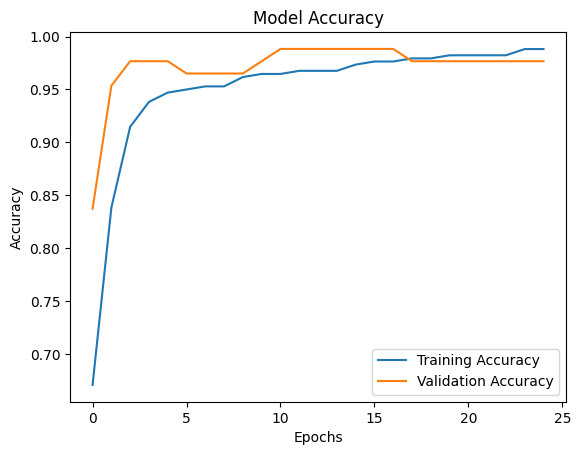

In [8]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()